In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


house_df = pd.read_csv('/content/kc-house-data.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


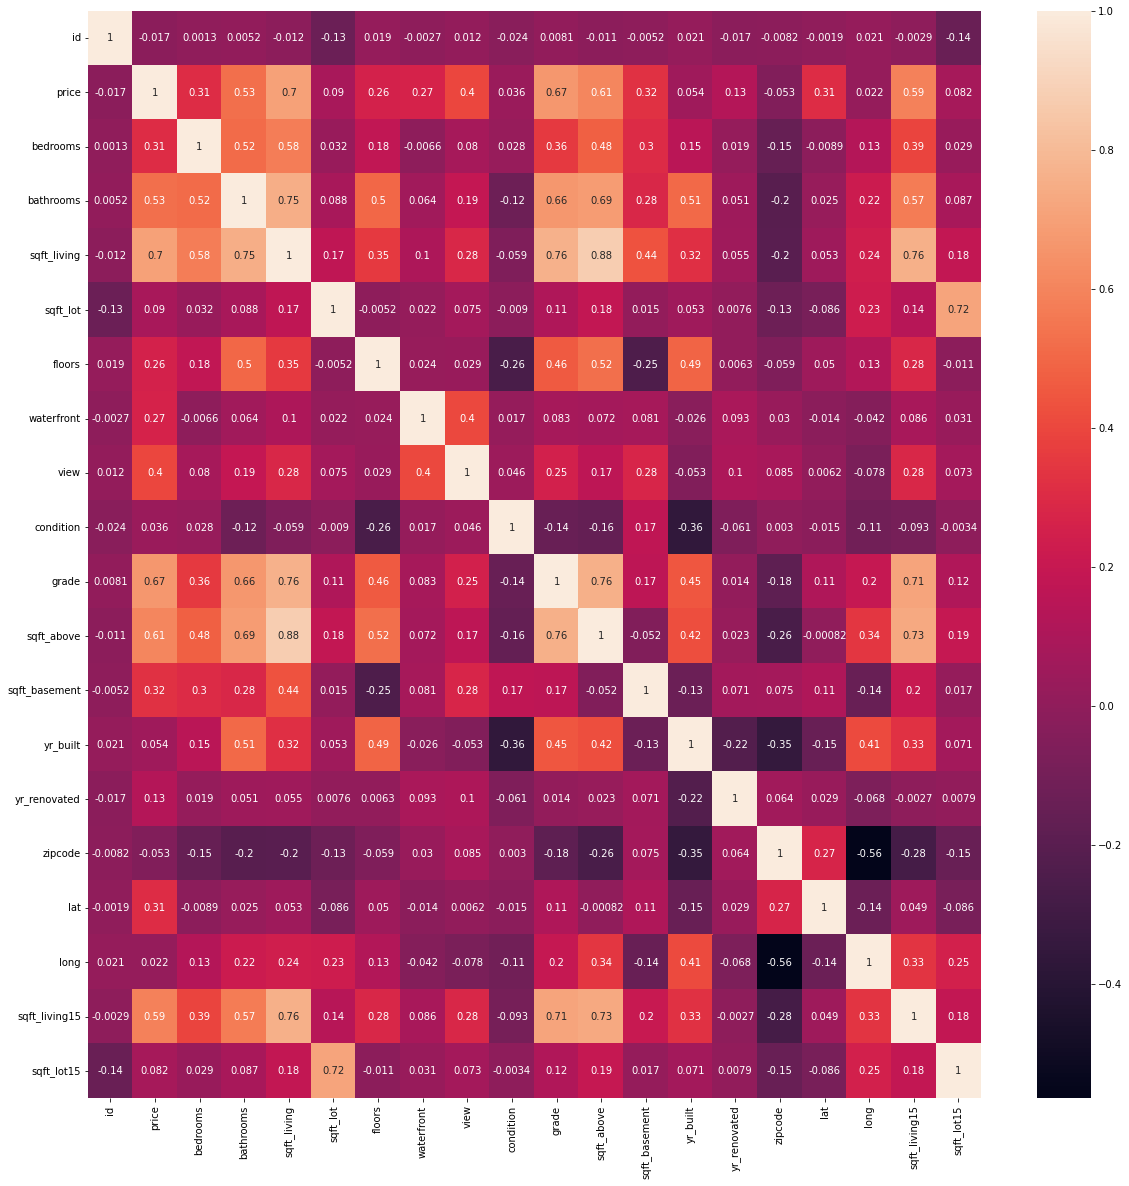

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(house_df.corr(), annot=True)
plt.show()

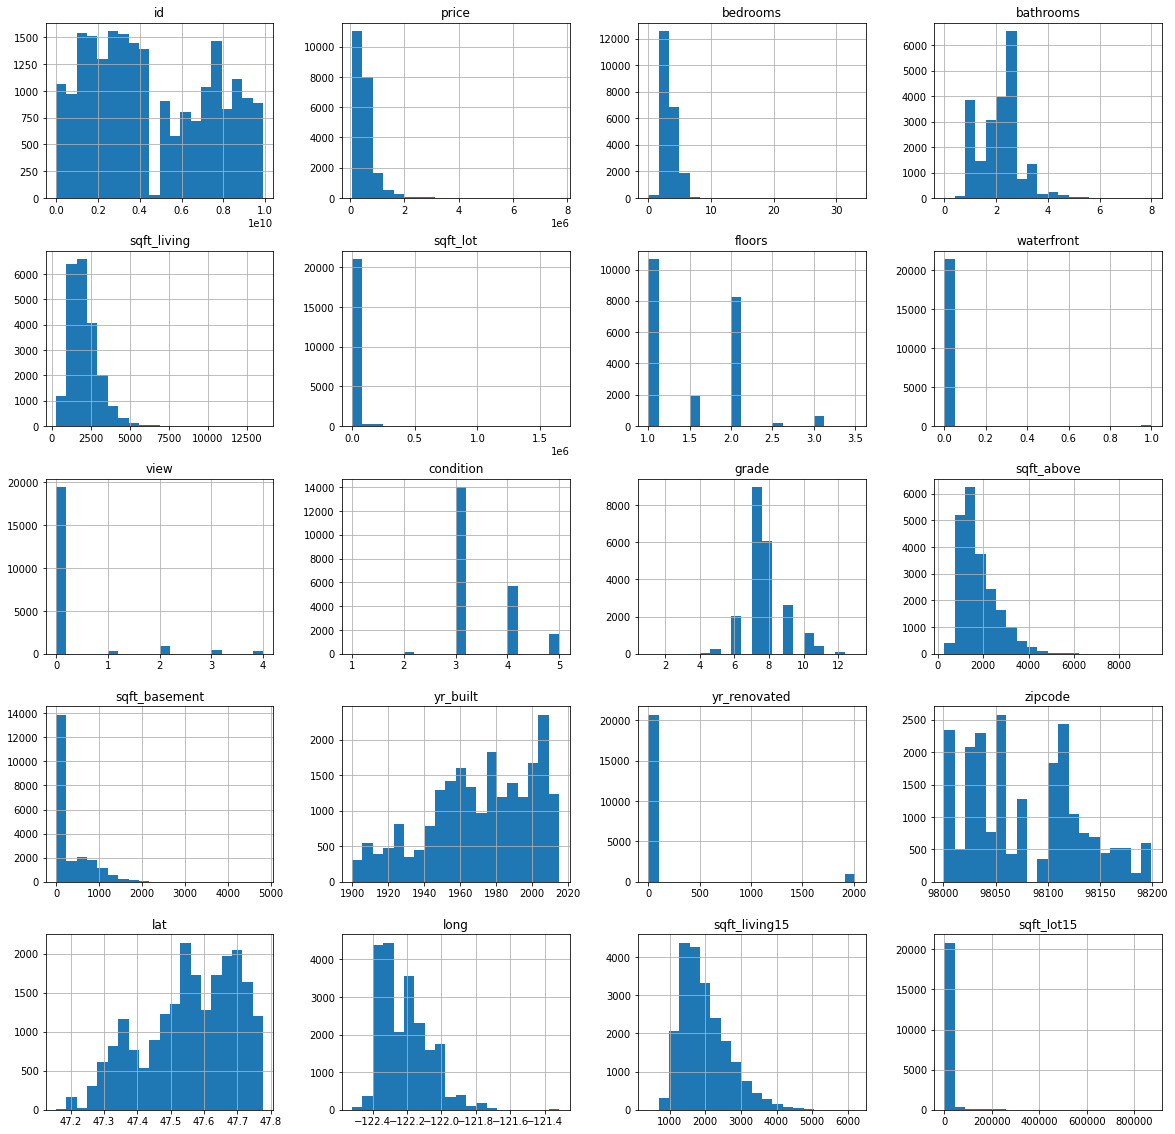

In [ ]:
house_df.hist(bins=20, figsize=(20, 20))
plt.show()

In [ ]:
high_corr_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
                       'waterfront', 'view', 'grade', 'lat']

X = house_df[high_corr_variables]
y = np.log(house_df['price'])
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,lat
0,3,1.00,1180,1.0,0,0,7,47.5112
1,3,2.25,2570,2.0,0,0,7,47.7210
2,2,1.00,770,1.0,0,0,6,47.7379
3,4,3.00,1960,1.0,0,0,7,47.5208
4,3,2.00,1680,1.0,0,0,8,47.6168
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,47.6993
21609,4,2.50,2310,2.0,0,0,8,47.5107
21610,2,0.75,1020,2.0,0,0,7,47.5944
21611,3,2.50,1600,2.0,0,0,8,47.5345


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
neural_regressor = tf.keras.models.Sequential()
neural_regressor.add(tf.keras.layers.Dense(units=6, activation='relu',
                                           input_shape=(8,)))
neural_regressor.add(tf.keras.layers.Dense(units=4, activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=3, activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=1, activation='linear'))
neural_regressor.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 6)                 54        
                                                                 
 dense_75 (Dense)            (None, 4)                 28        
                                                                 
 dense_76 (Dense)            (None, 3)                 15        
                                                                 
 dense_77 (Dense)            (None, 1)                 4         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10)
batch_size = X_train.shape[0] // 20

neural_regressor.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                         loss='mse')
epochs_info = neural_regressor.fit(X_train, 
                                   y_train,
                                   batch_size=batch_size,
                                   epochs=1000,
                                   validation_split=0.15,
                                   callbacks=[early_stopping_callback])

Epoch 1/1000
18/18 [==============================] - 1s 9ms/step - loss: 138.2242 - val_loss: 93.5744
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 45.2830 - val_loss: 2.6279
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 5.7764 - val_loss: 2.0884
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 2.3637 - val_loss: 1.7090
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.6242 - val_loss: 1.4100
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.3143 - val_loss: 1.1886
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.1094 - val_loss: 1.0219
Epoch 8/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9628 - val_loss: 0.8906
Epoch 9/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.8466 - val_loss: 0.7865
Epoch 10/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7521 - val_loss: 0.

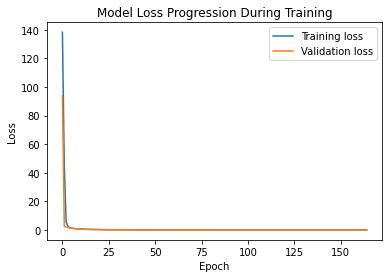

In [ ]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

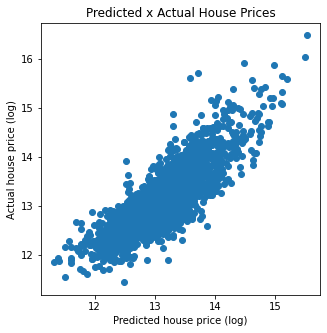

In [ ]:
y_pred = neural_regressor.predict(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.title("Predicted x Actual House Prices")
plt.xlabel("Predicted house price (log)")
plt.ylabel("Actual house price (log)")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 score: ", r2)
print("Adjusted R2 score: ", adjusted_r2)

Mean Absolute Error:  0.24380014486756313
Mean Squared Error:  0.10193379599566574
Root Mean Squared Error:  0.319270725240611
R2 score:  0.6464966502321849
Adjusted R2 score:  0.6456219125897035


## Neural Regressor on Full House Dataset

In [ ]:
X = house_df.drop(['id', 'date', 'price'], axis=1)
y = house_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
neural_regressor = tf.keras.models.Sequential()
neural_regressor.add(tf.keras.layers.Dense(units=10, activation='relu',
                                           input_shape=(18,)))
neural_regressor.add(tf.keras.layers.Dense(units=6, activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=4, activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=1, activation='linear'))

neural_regressor.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 10)                190       
                                                                 
 dense_52 (Dense)            (None, 6)                 66        
                                                                 
 dense_53 (Dense)            (None, 4)                 28        
                                                                 
 dense_54 (Dense)            (None, 1)                 5         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10)
batch_size = X_train.shape[0] // 20

neural_regressor.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                         loss='mse')
epochs_info = neural_regressor.fit(X_train,
                                   y_train,
                                   batch_size=batch_size,
                                   epochs=1000,
                                   validation_split=0.15,
                                   callbacks=[early_stopping_callback])

Epoch 1/1000
18/18 [==============================] - 1s 29ms/step - loss: 426446815232.0000 - val_loss: 392323366912.0000
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 426414505984.0000 - val_loss: 392254095360.0000
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 426277306368.0000 - val_loss: 392000798720.0000
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 425847259136.0000 - val_loss: 391300677632.0000
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 424772370432.0000 - val_loss: 389682266112.0000
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 422459375616.0000 - val_loss: 386414870528.0000
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 418049458176.0000 - val_loss: 380563587072.0000
Epoch 8/1000
18/18 [==============================] - 0s 4ms/step - loss: 410486276096.0000 - val_loss: 370889621504.0000
Epoch 9/1000
18/18 [===

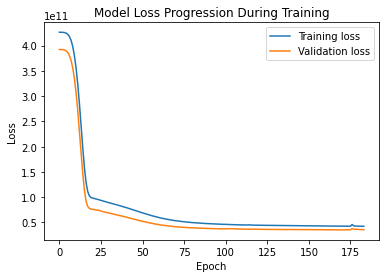

In [ ]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

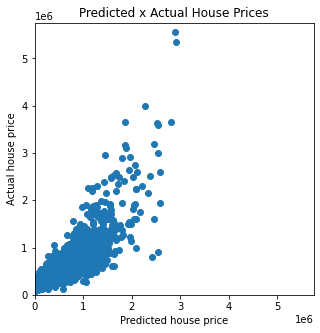

In [ ]:
y_pred = neural_regressor.predict(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test)
plt.title("Predicted x Actual House Prices")
plt.xlabel("Predicted house price")
plt.ylabel("Actual house price")
plt.xlim(0, 5.75e6)
plt.ylim(0, 5.75e6)
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 score: ", r2)
print("Adjusted R2 score: ", adjusted_r2)

Mean Absolute Error:  163979.067187131
Mean Squared Error:  55268570104.37708
Root Mean Squared Error:  235092.68407242512
R2 score:  0.6378664394936273
Adjusted R2 score:  0.6358439746816154
